In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from FFNN.Model import FFNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", parser='auto')
X = mnist.data.astype(np.float32) 
y = mnist.target.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42,
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


=== 1. Pengujian Pengaruh Depth dan Width ===

Testing 1 Hidden (16 neurons)...
Epoch 1/10, Loss: 0.40812722243523214
Epoch 2/10, Loss: 0.3127265234558234
Epoch 3/10, Loss: 0.2709150938999735
Epoch 4/10, Loss: 0.24450181909934712
Epoch 5/10, Loss: 0.22568198538801226
Epoch 6/10, Loss: 0.21124331975036345
Epoch 7/10, Loss: 0.1998334196962193
Epoch 8/10, Loss: 0.19046200588648124
Epoch 9/10, Loss: 0.1825280124817689
Epoch 10/10, Loss: 0.17579418965903157
Accuracy: 0.9383

Testing 1 Hidden (32 neurons)...
Epoch 1/10, Loss: 0.37006771761576607
Epoch 2/10, Loss: 0.2856355040595127
Epoch 3/10, Loss: 0.2458739758049789
Epoch 4/10, Loss: 0.22013412408578178
Epoch 5/10, Loss: 0.20064931723012824
Epoch 6/10, Loss: 0.1848299451203452
Epoch 7/10, Loss: 0.17169392812970707
Epoch 8/10, Loss: 0.16072525983331779
Epoch 9/10, Loss: 0.1512690112255813
Epoch 10/10, Loss: 0.1431801006166206
Accuracy: 0.9455

Testing 1 Hidden (64 neurons)...
Epoch 1/10, Loss: 0.3537535835879135
Epoch 2/10, Loss: 0.2658043

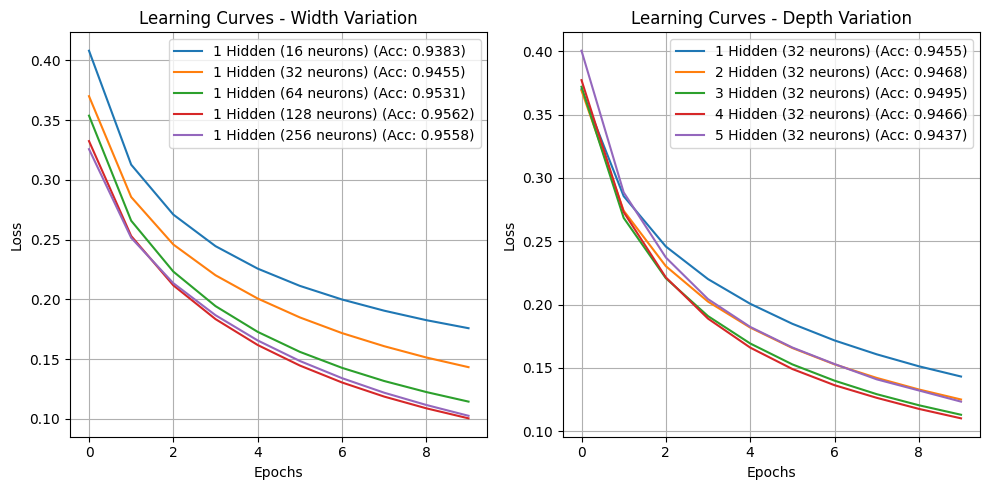

In [3]:
# =============================================================================
# 1. Pengujian Pengaruh Depth dan Width
# =============================================================================
print("\n=== 1. Pengujian Pengaruh Depth dan Width ===")

width_models = [
    {"layers": [784, 16, 10], "name": "1 Hidden (16 neurons)"},
    {"layers": [784, 32, 10], "name": "1 Hidden (32 neurons)"},
    {"layers": [784, 64, 10], "name": "1 Hidden (64 neurons)"},
    {"layers": [784, 128, 10], "name": "1 Hidden (128 neurons)"},
    {"layers": [784, 256, 10], "name": "1 Hidden (256 neurons)"},
]

depth_models = [
    {"layers": [784, 32, 10], "name": "1 Hidden (32 neurons)"},
    {"layers": [784, 32, 32, 10], "name": "2 Hidden (32 neurons)"},
    {"layers": [784, 32, 32, 32, 10], "name": "3 Hidden (32 neurons)"},
    {"layers": [784, 32, 32, 32, 32, 10], "name": "4 Hidden (32 neurons)"},
    {"layers": [784, 32, 32, 32, 32, 32, 10], "name": "5 Hidden (32 neurons)"},
]

width_results = []
for config in width_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=config["layers"],
        activations=["relu"] * (len(config["layers"]) - 2) + ["softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )
    
    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    width_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

depth_results = []
for config in depth_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=config["layers"],
        activations=["relu"] * (len(config["layers"]) - 2) + ["softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )
    
    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    depth_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for result in width_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Width Variation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for result in depth_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Depth Variation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== 2. Pengujian Pengaruh Fungsi Aktivasi ===

Testing Linear activation...
Epoch 1/10, Loss: 0.3727819526946916
Epoch 2/10, Loss: 0.31570636228894583
Epoch 3/10, Loss: 0.29324821405683954
Epoch 4/10, Loss: 0.2800948597543266
Epoch 5/10, Loss: 0.2710792246839802
Epoch 6/10, Loss: 0.26450317463180784
Epoch 7/10, Loss: 0.2592421521501595
Epoch 8/10, Loss: 0.2546827856609904
Epoch 9/10, Loss: 0.25118381954005464
Epoch 10/10, Loss: 0.24851321380706448
Accuracy: 0.9183


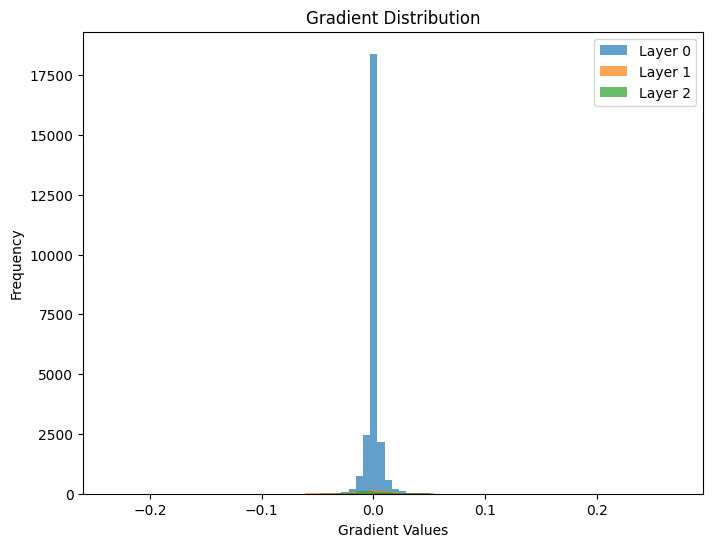

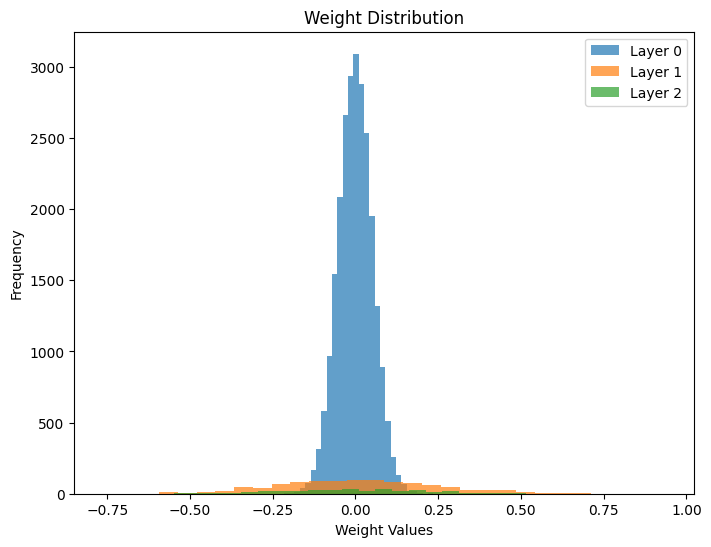


Testing ReLU activation...
Epoch 1/10, Loss: 0.36909654917324514
Epoch 2/10, Loss: 0.27414963182457414
Epoch 3/10, Loss: 0.23034269802261406
Epoch 4/10, Loss: 0.20233374235942878
Epoch 5/10, Loss: 0.18185358003037275
Epoch 6/10, Loss: 0.16570290111069347
Epoch 7/10, Loss: 0.15278744030210228
Epoch 8/10, Loss: 0.14209268932730498
Epoch 9/10, Loss: 0.13295718761563674
Epoch 10/10, Loss: 0.12503435805248456
Accuracy: 0.9468


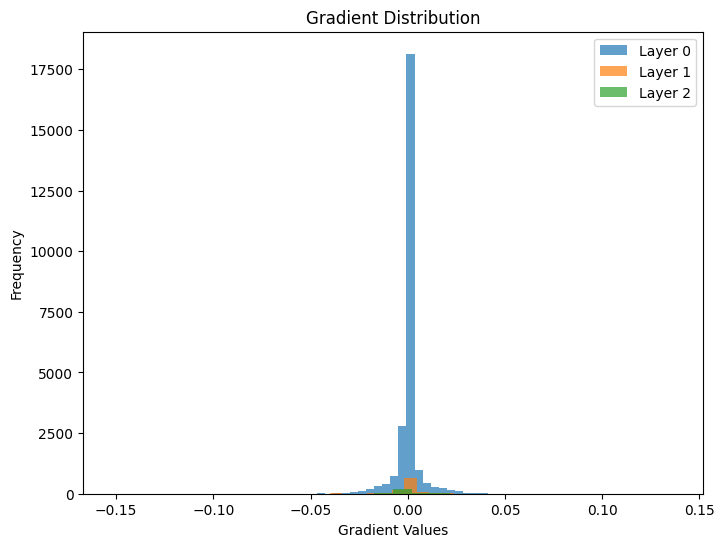

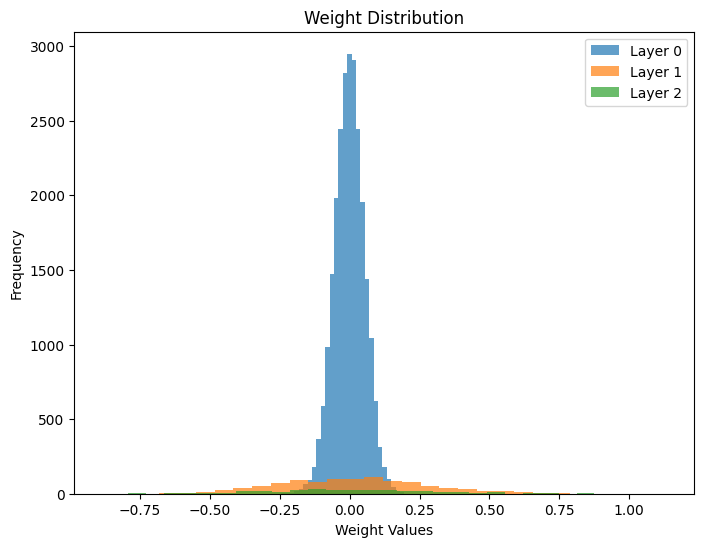


Testing Sigmoid activation...
Epoch 1/10, Loss: 1.6248893756985967
Epoch 2/10, Loss: 1.0276725458464246
Epoch 3/10, Loss: 0.7440525595733782
Epoch 4/10, Loss: 0.592489846239771
Epoch 5/10, Loss: 0.4947800434680801
Epoch 6/10, Loss: 0.4281154016971522
Epoch 7/10, Loss: 0.38168050538619924
Epoch 8/10, Loss: 0.34805145432332296
Epoch 9/10, Loss: 0.3225527727457351
Epoch 10/10, Loss: 0.30240016411402365
Accuracy: 0.9155


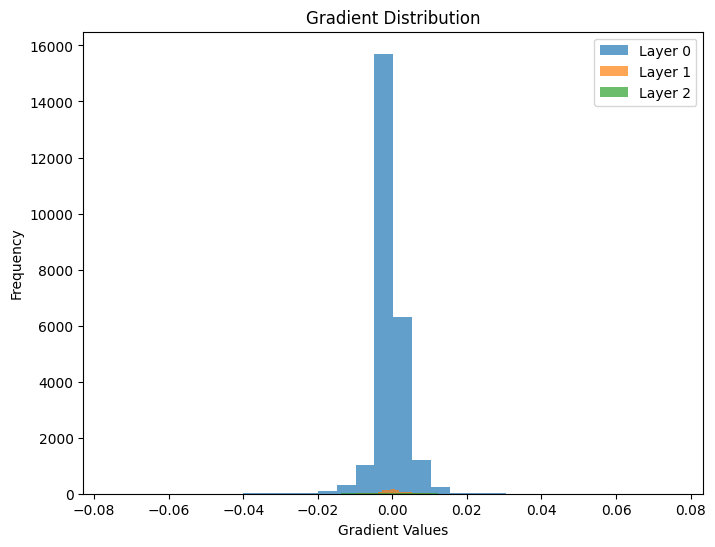

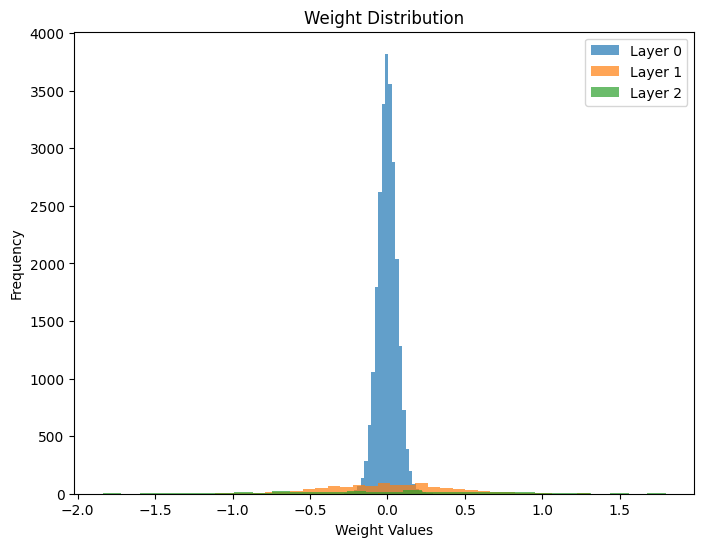


Testing Tanh activation...
Epoch 1/10, Loss: 0.43626144504678466
Epoch 2/10, Loss: 0.3086729044590973
Epoch 3/10, Loss: 0.25758052327644504
Epoch 4/10, Loss: 0.22661649601600947
Epoch 5/10, Loss: 0.20438043945498616
Epoch 6/10, Loss: 0.18712583893448267
Epoch 7/10, Loss: 0.17326871490476897
Epoch 8/10, Loss: 0.16177620375535898
Epoch 9/10, Loss: 0.15196184787021347
Epoch 10/10, Loss: 0.14344797932245484
Accuracy: 0.9426


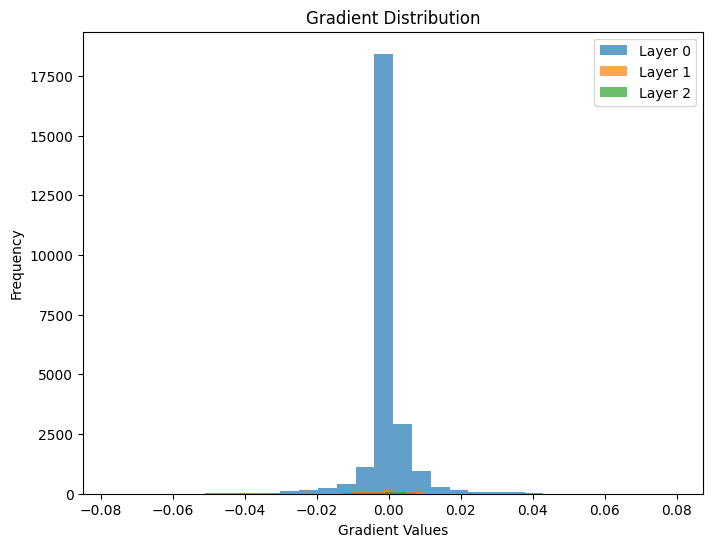

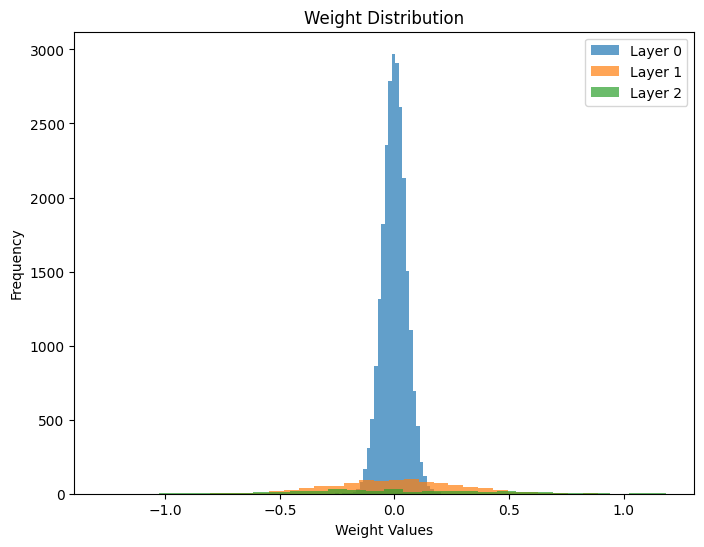


Testing Leaky ReLU activation...
Epoch 1/10, Loss: 0.3684146527772546
Epoch 2/10, Loss: 0.27404285358663033
Epoch 3/10, Loss: 0.23029367591514696
Epoch 4/10, Loss: 0.20246839419525706
Epoch 5/10, Loss: 0.18207379893103756
Epoch 6/10, Loss: 0.16599942543107896
Epoch 7/10, Loss: 0.15297086128895088
Epoch 8/10, Loss: 0.14223970386060455
Epoch 9/10, Loss: 0.13308271836353844
Epoch 10/10, Loss: 0.12507254494033412
Accuracy: 0.9466


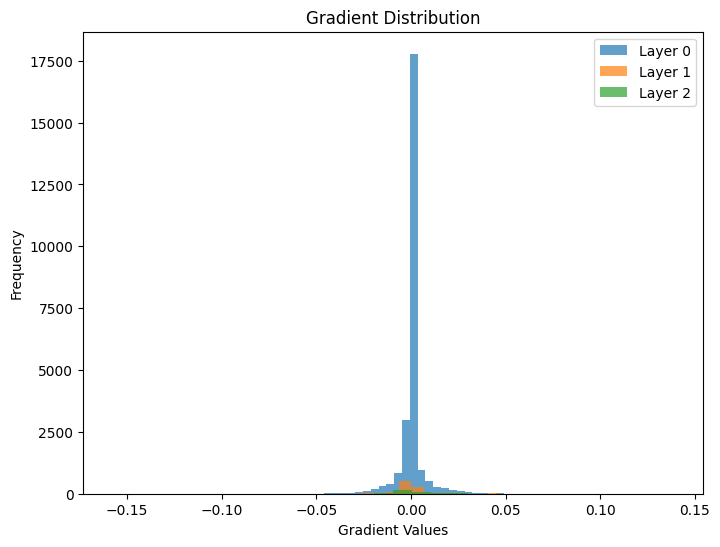

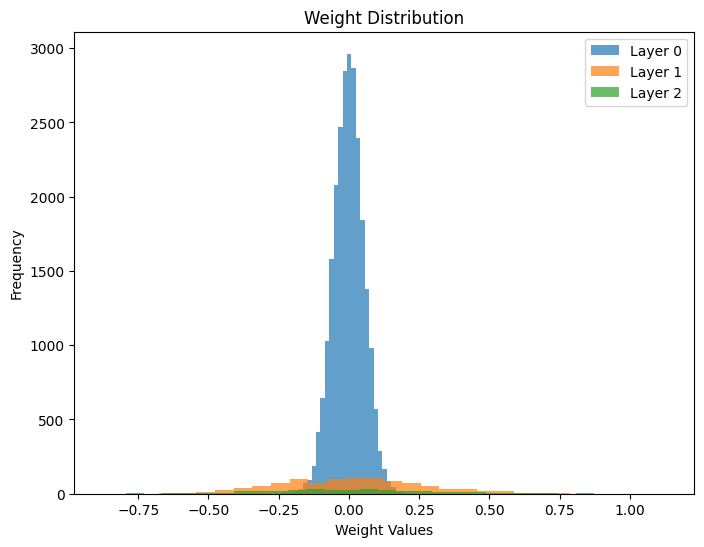


Testing eLU activation...
Epoch 1/10, Loss: 0.3467558909336324
Epoch 2/10, Loss: 0.265120872606177
Epoch 3/10, Loss: 0.22345148002202722
Epoch 4/10, Loss: 0.1949378975065853
Epoch 5/10, Loss: 0.17390520047393074
Epoch 6/10, Loss: 0.15736566260608745
Epoch 7/10, Loss: 0.1441306117382581
Epoch 8/10, Loss: 0.1332052268915423
Epoch 9/10, Loss: 0.123985960123386
Epoch 10/10, Loss: 0.11615234077241425
Accuracy: 0.9506


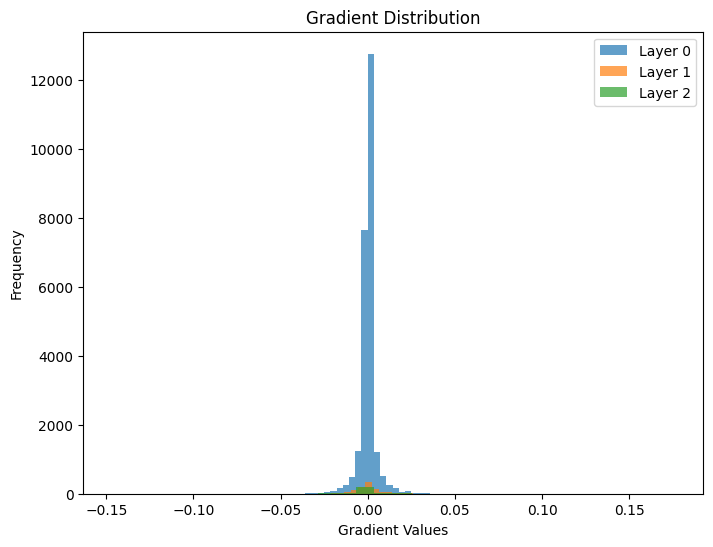

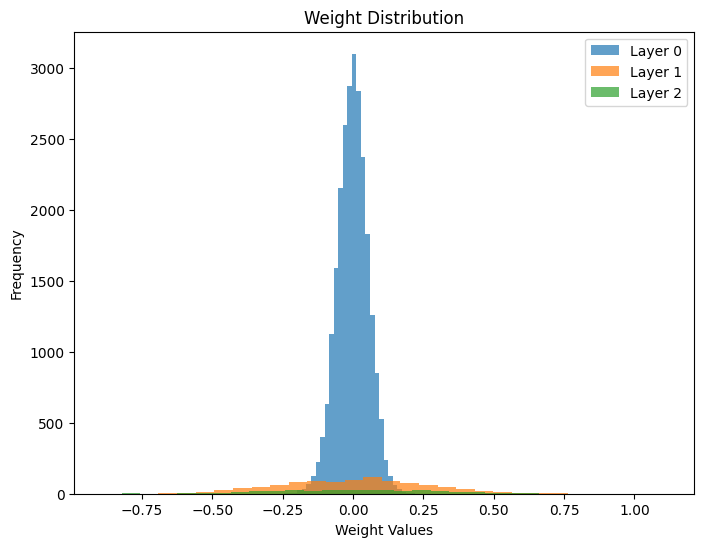


Testing Swish activation...
Epoch 1/10, Loss: 0.35663238165595884
Epoch 2/10, Loss: 0.2635053246116988
Epoch 3/10, Loss: 0.22025320495072467
Epoch 4/10, Loss: 0.19241076097524334
Epoch 5/10, Loss: 0.17185132398108247
Epoch 6/10, Loss: 0.15577941554985417
Epoch 7/10, Loss: 0.14288363762303502
Epoch 8/10, Loss: 0.132289696232366
Epoch 9/10, Loss: 0.12326508685559454
Epoch 10/10, Loss: 0.11545046020925274
Accuracy: 0.9496


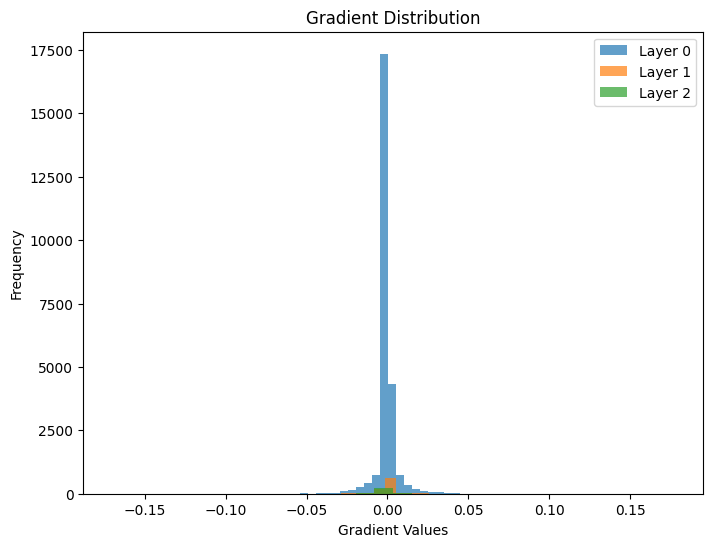

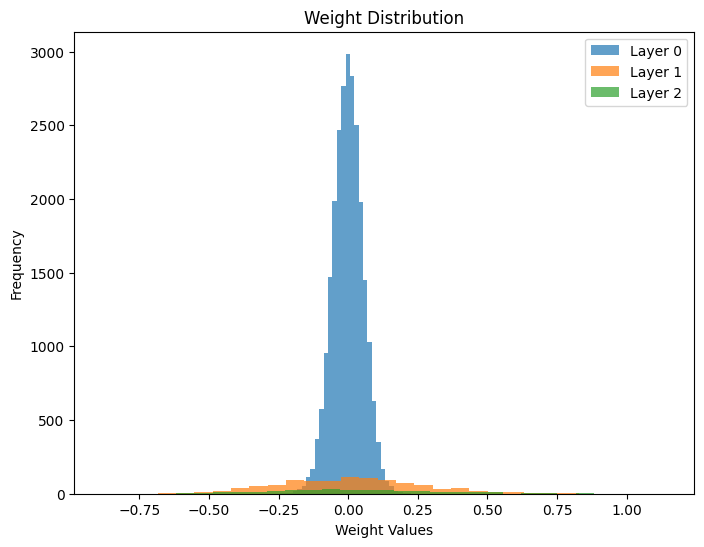

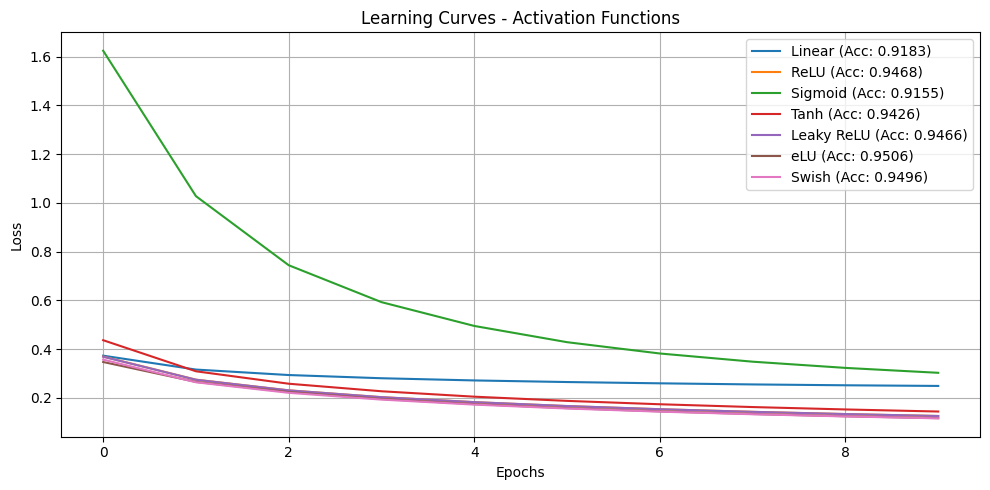

In [5]:
# =============================================================================
# 2. Pengujian Pengaruh Fungsi Aktivasi
# =============================================================================
print("\n=== 2. Pengujian Pengaruh Fungsi Aktivasi ===")

activation_models = [
    {"activation": "linear", "name": "Linear"},
    {"activation": "relu", "name": "ReLU"},
    {"activation": "sigmoid", "name": "Sigmoid"},
    {"activation": "tanh", "name": "Tanh"},
    {"activation": "leaky_relu", "name": "Leaky ReLU"},
    {"activation": "elu", "name": "eLU"},
    {"activation": "swish", "name": "Swish"},
]

activation_results = []
for config in activation_models:
    print(f"\nTesting {config['name']} activation...")
    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=[config["activation"], config["activation"], "softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )
    
    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    activation_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

    model.plot_gradient_distribution([0, 1, 2])
    model.plot_weight_distribution([0, 1, 2])

plt.figure(figsize=(10, 5))
for result in activation_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== 3. Pengujian Pengaruh Learning Rate ===

Testing LR = 0.001...
Epoch 1/10, Loss: 1.3778150688019024
Epoch 2/10, Loss: 0.9235124790444698
Epoch 3/10, Loss: 0.7031031759975502
Epoch 4/10, Loss: 0.5828923058783111
Epoch 5/10, Loss: 0.510140021039499
Epoch 6/10, Loss: 0.46174218209039325
Epoch 7/10, Loss: 0.42679936058672213
Epoch 8/10, Loss: 0.40007341551021747
Epoch 9/10, Loss: 0.37867491155587896
Epoch 10/10, Loss: 0.3609478934725154
Accuracy: 0.8939


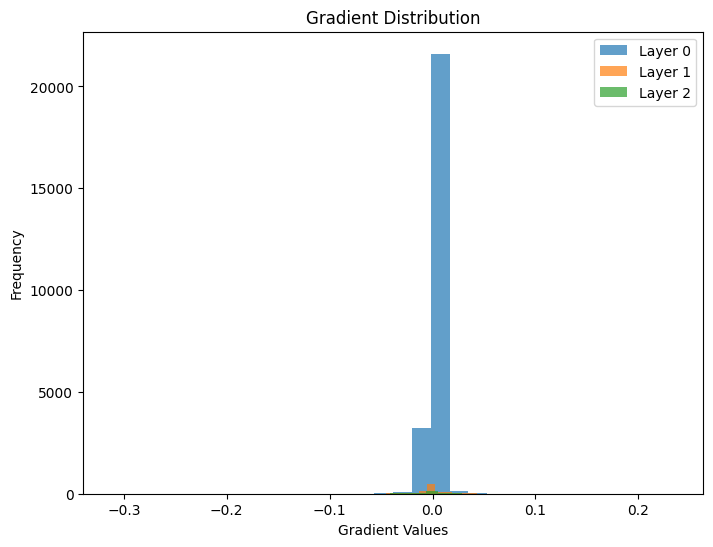

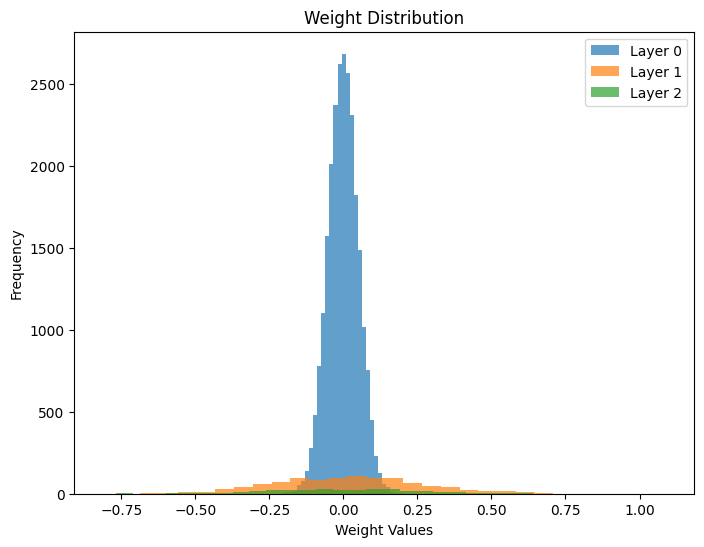


Testing LR = 0.01...
Epoch 1/10, Loss: 0.36909654917324514
Epoch 2/10, Loss: 0.27414963182457414
Epoch 3/10, Loss: 0.23034269802261406
Epoch 4/10, Loss: 0.20233374235942878
Epoch 5/10, Loss: 0.18185358003037275
Epoch 6/10, Loss: 0.16570290111069347
Epoch 7/10, Loss: 0.15278744030210228
Epoch 8/10, Loss: 0.14209268932730498
Epoch 9/10, Loss: 0.13295718761563674
Epoch 10/10, Loss: 0.12503435805248456
Accuracy: 0.9468


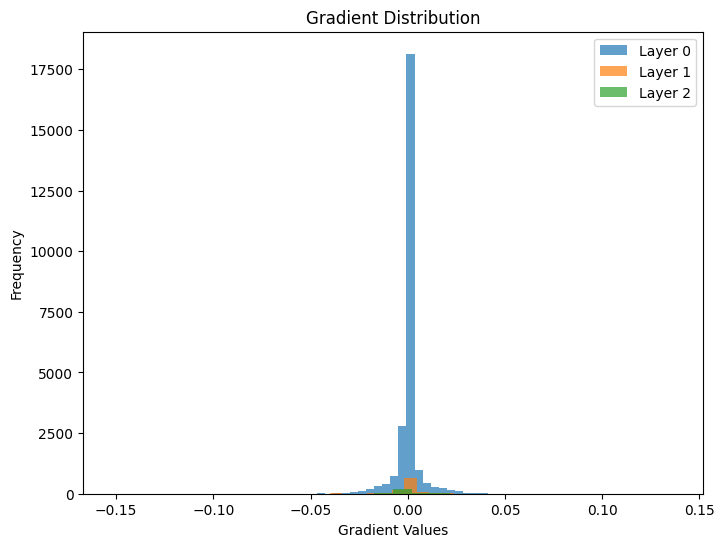

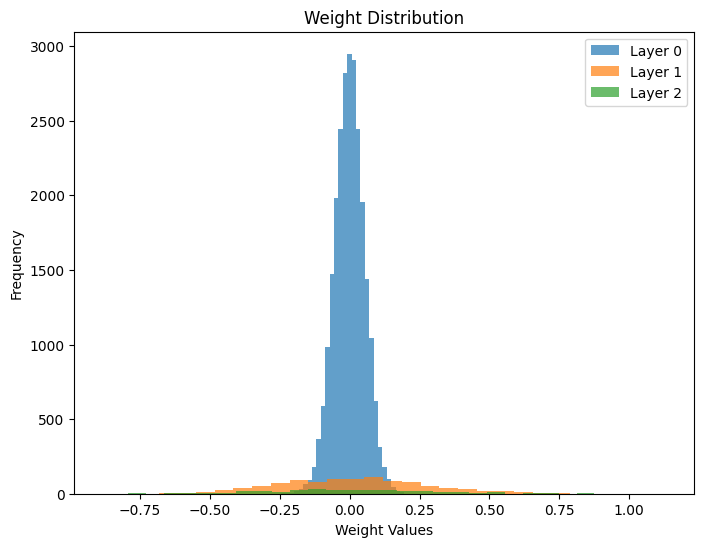


Testing LR = 0.1...
Epoch 1/10, Loss: 0.18170631389751543
Epoch 2/10, Loss: 0.1233716703450845
Epoch 3/10, Loss: 0.09837990884634688
Epoch 4/10, Loss: 0.08704588442841445
Epoch 5/10, Loss: 0.07882377237640159
Epoch 6/10, Loss: 0.07093972664641396
Epoch 7/10, Loss: 0.06965261400816587
Epoch 8/10, Loss: 0.06438596255710491
Epoch 9/10, Loss: 0.0579090042776651
Epoch 10/10, Loss: 0.05189709227292387
Accuracy: 0.9554


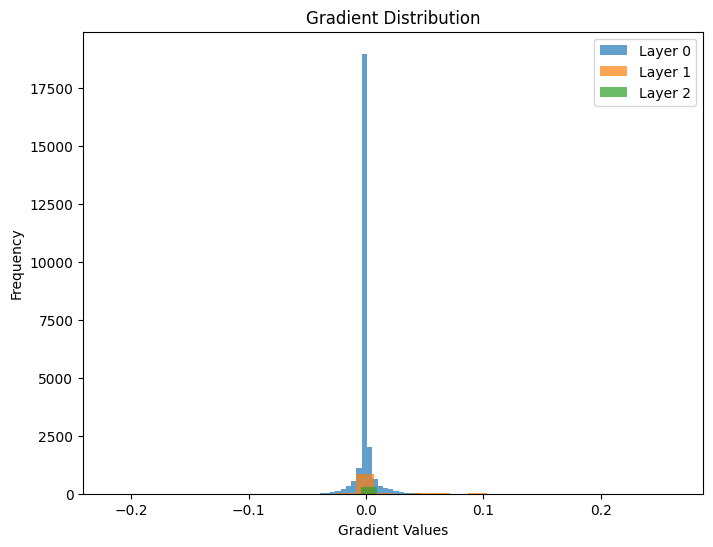

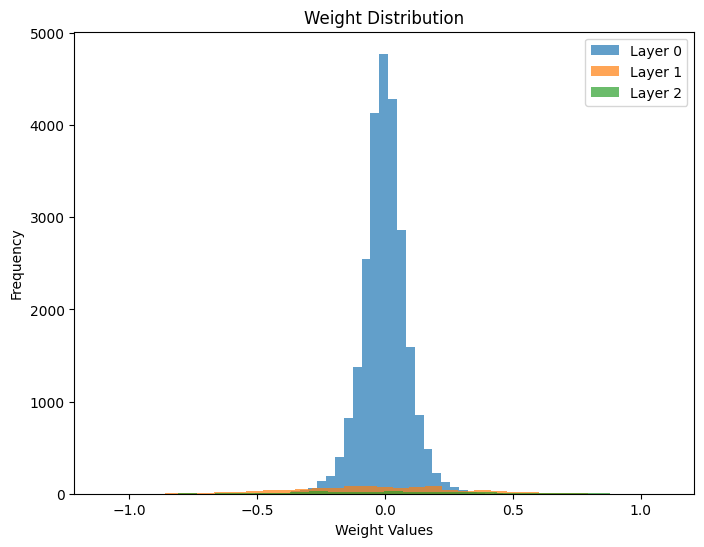

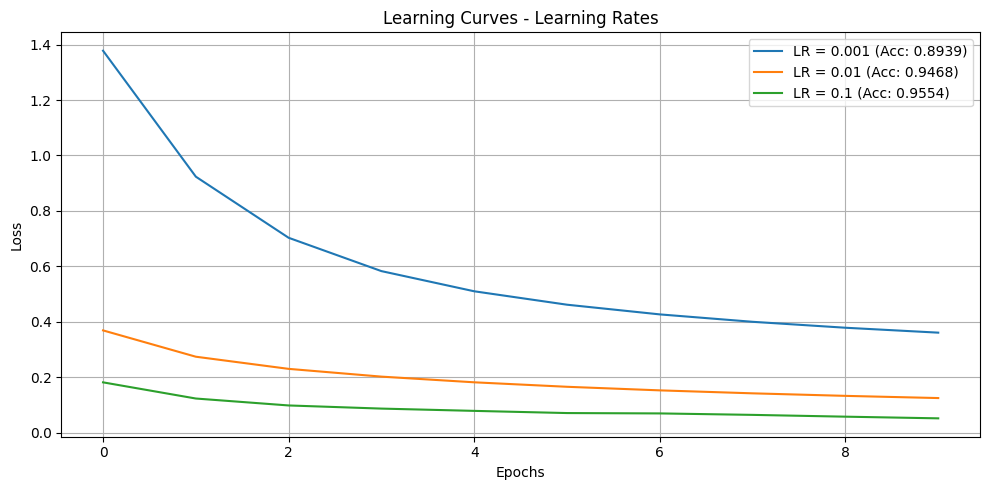

In [6]:
# =============================================================================
# 3. Pengujian Pengaruh Learning Rate
# =============================================================================
print("\n=== 3. Pengujian Pengaruh Learning Rate ===")

lr_models = [
    {"lr": 0.001, "name": "LR = 0.001"},
    {"lr": 0.01, "name": "LR = 0.01"},
    {"lr": 0.1, "name": "LR = 0.1"},
]

lr_results = []
for config in lr_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=["relu", "relu", "softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )
    
    history = model.train(X_train, y_train, epochs=10, lr=config["lr"], batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    lr_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

    model.plot_gradient_distribution([0, 1, 2])
    model.plot_weight_distribution([0, 1, 2])    

plt.figure(figsize=(10, 5))
for result in lr_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== 4. Pengujian Pengaruh Inisialisasi Bobot ===

Testing Zero initialization...
Epoch 1/10, Loss: 2.301263871610762
Epoch 2/10, Loss: 2.3012365034096565
Epoch 3/10, Loss: 2.3012370188989597
Epoch 4/10, Loss: 2.301237198331156
Epoch 5/10, Loss: 2.301237222709291
Epoch 6/10, Loss: 2.3012372252368003
Epoch 7/10, Loss: 2.301237225383412
Epoch 8/10, Loss: 2.301237225360693
Epoch 9/10, Loss: 2.3012372253486864
Epoch 10/10, Loss: 2.3012372253452145
Accuracy: 0.1143


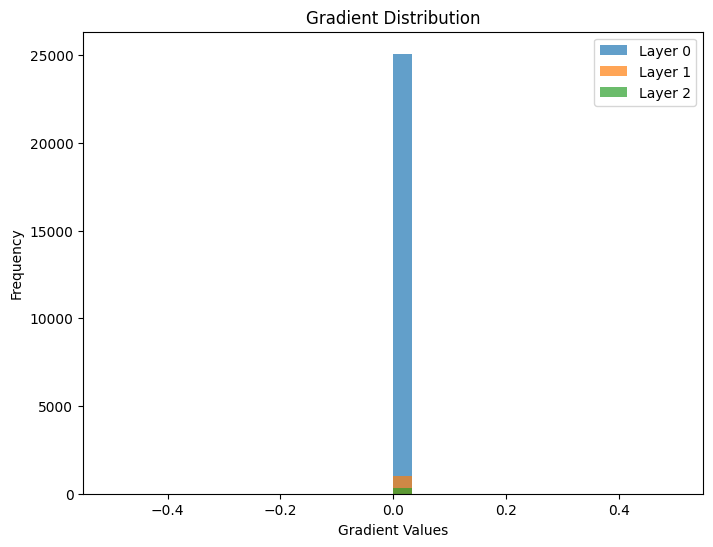

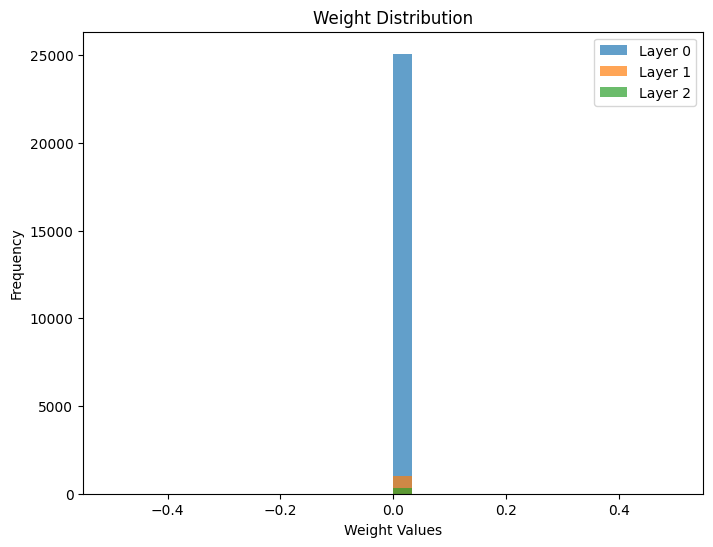


Testing Uniform initialization...
Epoch 1/10, Loss: 1.031075492987943
Epoch 2/10, Loss: 0.6843913409179414
Epoch 3/10, Loss: 0.551193563761659
Epoch 4/10, Loss: 0.47679763173073036
Epoch 5/10, Loss: 0.4279203918173811
Epoch 6/10, Loss: 0.39100014767852886
Epoch 7/10, Loss: 0.36121957378966674
Epoch 8/10, Loss: 0.3367349644204399
Epoch 9/10, Loss: 0.31640995682925993
Epoch 10/10, Loss: 0.29882696205492587
Accuracy: 0.9048


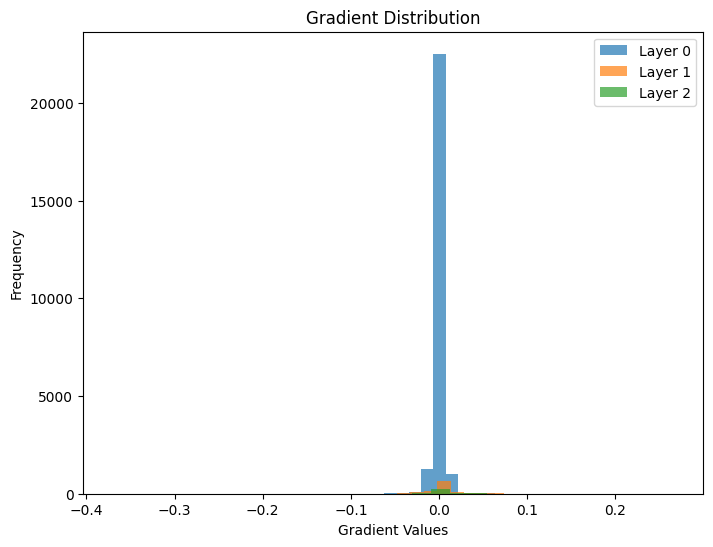

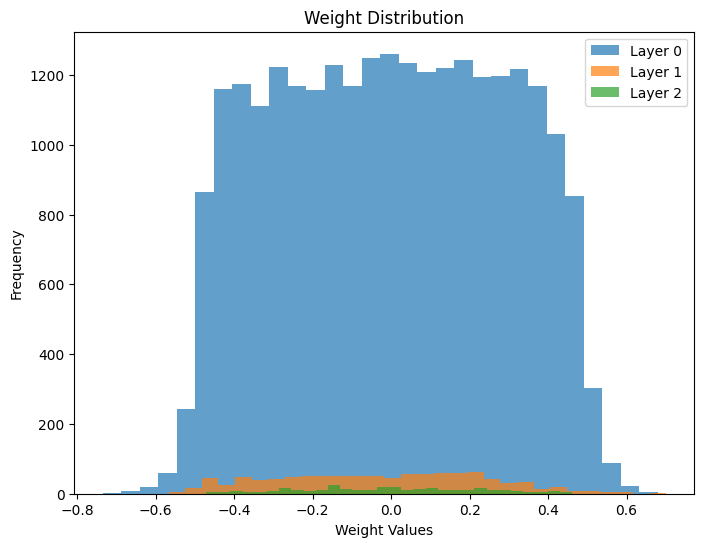


Testing Uniform initialization...
Epoch 1/10, Loss: 1.1210872389689999
Epoch 2/10, Loss: 0.7268697299344664
Epoch 3/10, Loss: 0.5688427588582161
Epoch 4/10, Loss: 0.4829908875425592
Epoch 5/10, Loss: 0.4275086775592402
Epoch 6/10, Loss: 0.38849217121628293
Epoch 7/10, Loss: 0.35901173543053827
Epoch 8/10, Loss: 0.3350508718365558
Epoch 9/10, Loss: 0.3150297994396994
Epoch 10/10, Loss: 0.29805578905870445
Accuracy: 0.9034


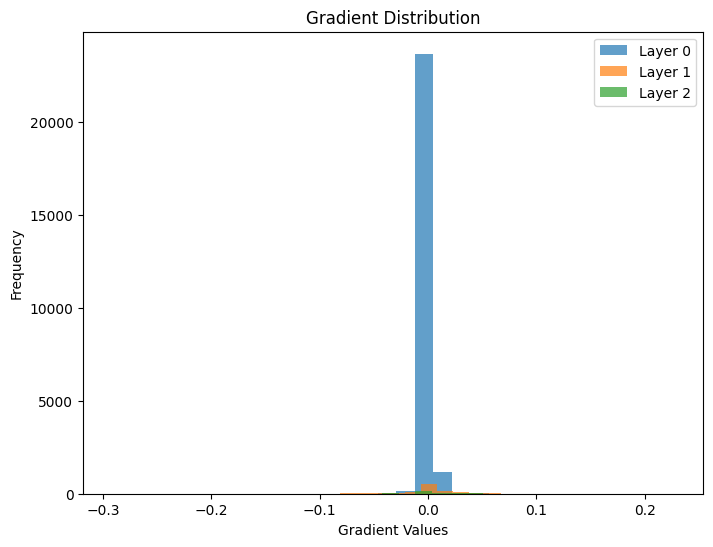

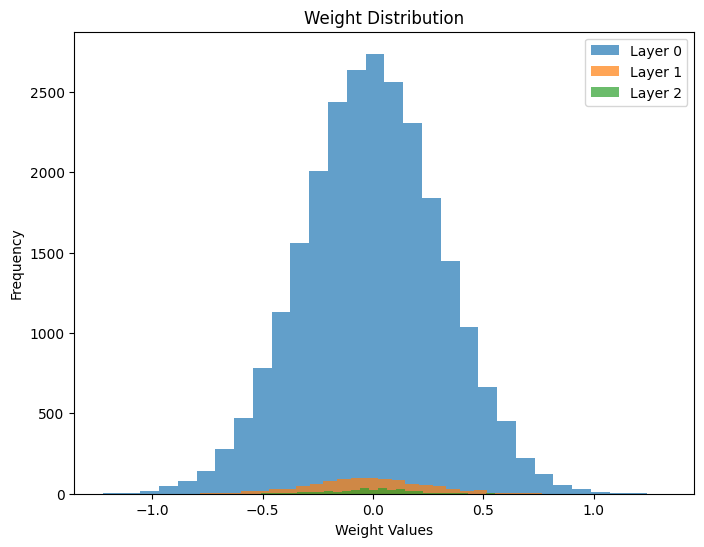


Testing He initialization...
Epoch 1/10, Loss: 0.36909654917324514
Epoch 2/10, Loss: 0.27414963182457414
Epoch 3/10, Loss: 0.23034269802261406
Epoch 4/10, Loss: 0.20233374235942878
Epoch 5/10, Loss: 0.18185358003037275
Epoch 6/10, Loss: 0.16570290111069347
Epoch 7/10, Loss: 0.15278744030210228
Epoch 8/10, Loss: 0.14209268932730498
Epoch 9/10, Loss: 0.13295718761563674
Epoch 10/10, Loss: 0.12503435805248456
Accuracy: 0.9468


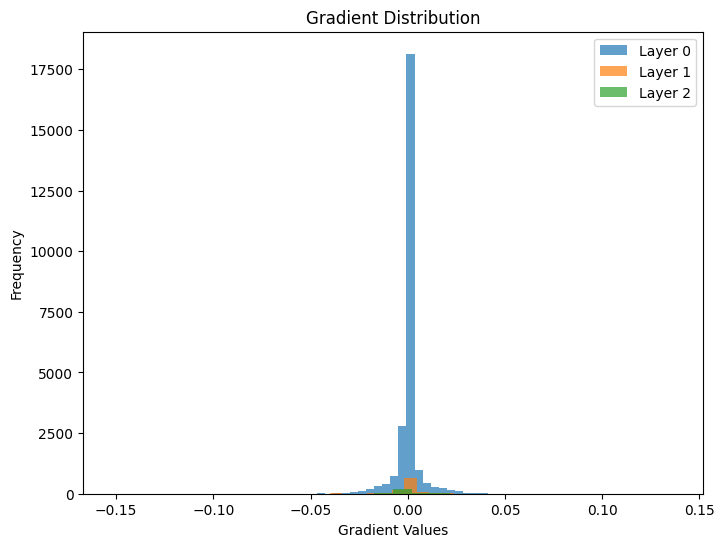

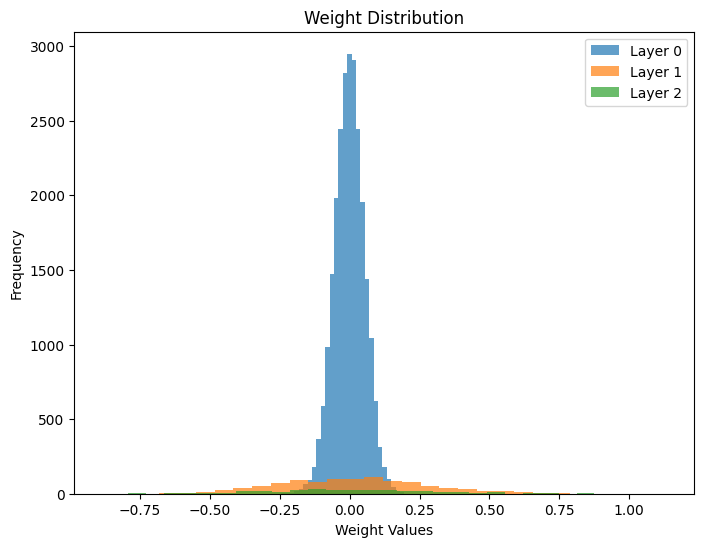


Testing Xavier initialization...
Epoch 1/10, Loss: 0.3644585356452817
Epoch 2/10, Loss: 0.26703391574806873
Epoch 3/10, Loss: 0.221113324690119
Epoch 4/10, Loss: 0.1916809508903009
Epoch 5/10, Loss: 0.170420882669312
Epoch 6/10, Loss: 0.1540184186247685
Epoch 7/10, Loss: 0.14096445371972313
Epoch 8/10, Loss: 0.13020679634939755
Epoch 9/10, Loss: 0.12099896897339368
Epoch 10/10, Loss: 0.11317313598416166
Accuracy: 0.9531


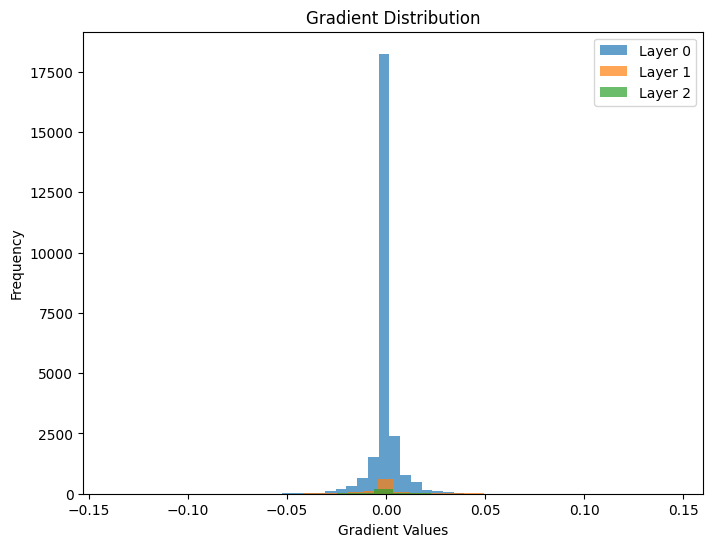

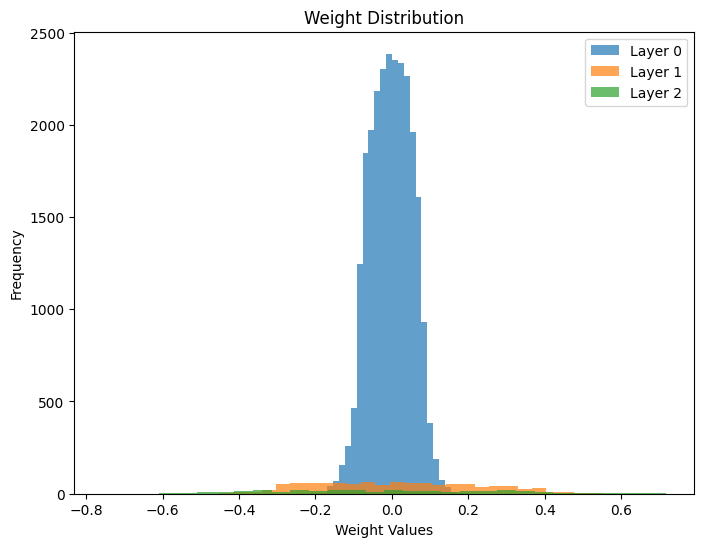

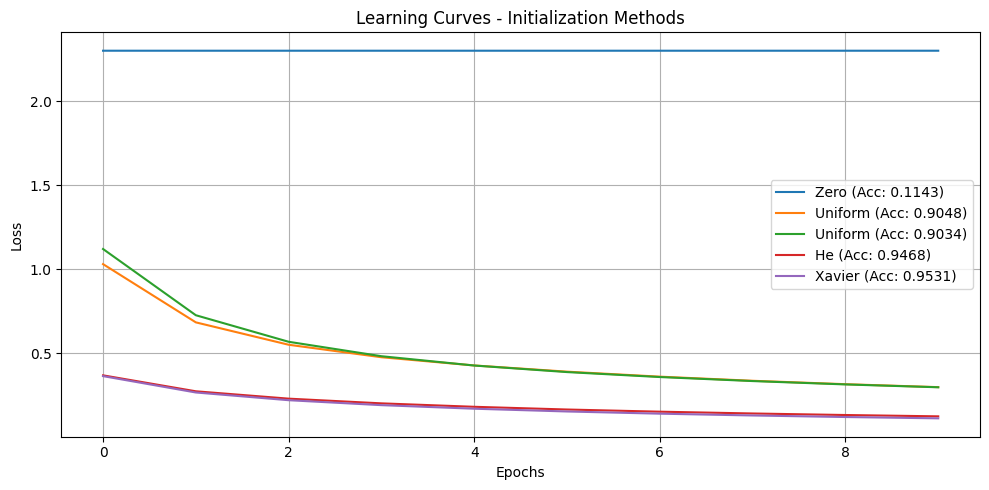

In [7]:
# =============================================================================
# 4. Pengujian Pengaruh Inisialisasi Bobot
# =============================================================================
print("\n=== 4. Pengujian Pengaruh Inisialisasi Bobot ===")

init_models = [
    {"method": "zero", "name": "Zero", "kwargs": {}},
    {"method": "uniform", "name": "Uniform", "kwargs": {"seed": 42, "lower": -0.5, "upper": 0.5}},
    {"method": "normal", "name": "Uniform", "kwargs": {"seed": 42, "mean": 0.0, "variance": 0.1}},
    {"method": "he", "name": "He", "kwargs": {"seed": 42}},
    {"method": "xavier", "name": "Xavier", "kwargs": {"seed": 42}},
]

init_results = []
for config in init_models:
    print(f"\nTesting {config['name']} initialization...")
    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=["relu", "relu", "softmax"],
        loss="categorical_cross_entropy",
        init_method=config["method"],
        **config["kwargs"]
    )
    
    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    init_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

    model.plot_gradient_distribution([0, 1, 2])
    model.plot_weight_distribution([0, 1, 2])    

plt.figure(figsize=(10, 5))
for result in init_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Initialization Methods")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== 5. Pengujian Pengaruh RMS_Norm ===

Testing  With RMS_Norm...
Epoch 1/10, Loss: 1.020497018911318
Epoch 2/10, Loss: 0.8025440515576686
Epoch 3/10, Loss: 0.6980681102068901
Epoch 4/10, Loss: 0.6387615954529374
Epoch 5/10, Loss: 0.6009382085740168
Epoch 6/10, Loss: 0.5741494854770735
Epoch 7/10, Loss: 0.5537412387464754
Epoch 8/10, Loss: 0.5376008456640107
Epoch 9/10, Loss: 0.524501329137876
Epoch 10/10, Loss: 0.5135608239083008
Accuracy: 0.9129


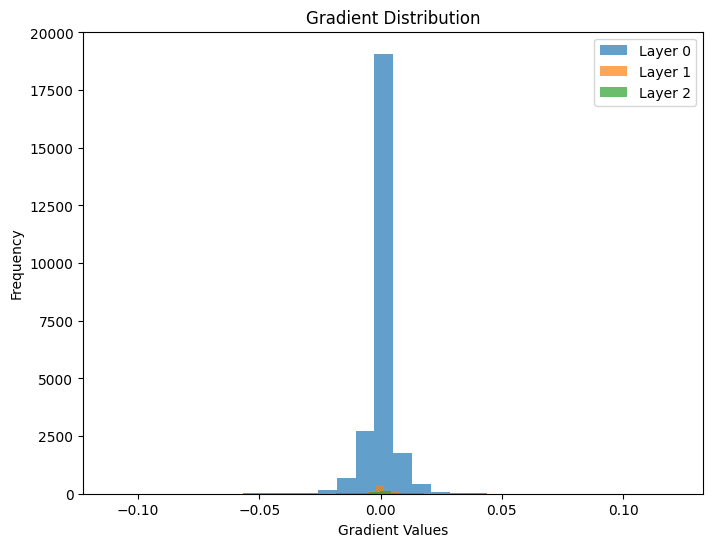

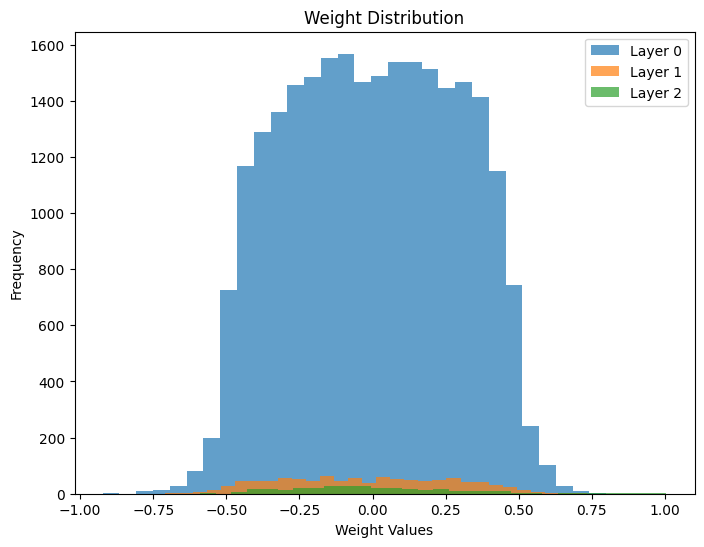


Testing Without RMS_Norm...
Epoch 1/10, Loss: 0.941566510211311
Epoch 2/10, Loss: 0.6358214161392828
Epoch 3/10, Loss: 0.5128361966629693
Epoch 4/10, Loss: 0.44175158825628635
Epoch 5/10, Loss: 0.39516003251963183
Epoch 6/10, Loss: 0.36105205720116823
Epoch 7/10, Loss: 0.3344603365287118
Epoch 8/10, Loss: 0.3130163995595708
Epoch 9/10, Loss: 0.2947968813421803
Epoch 10/10, Loss: 0.27933780864796026
Accuracy: 0.9083


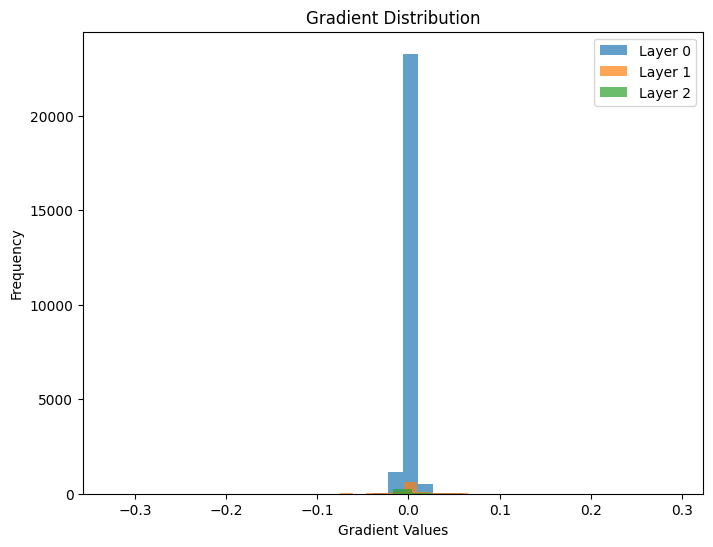

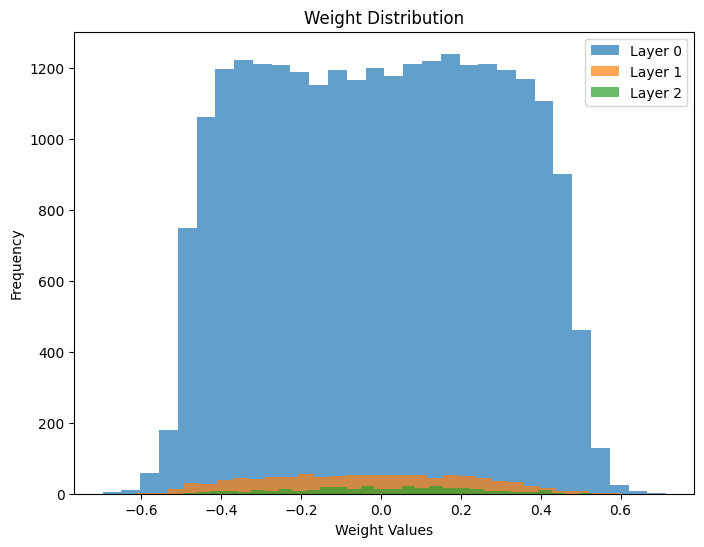

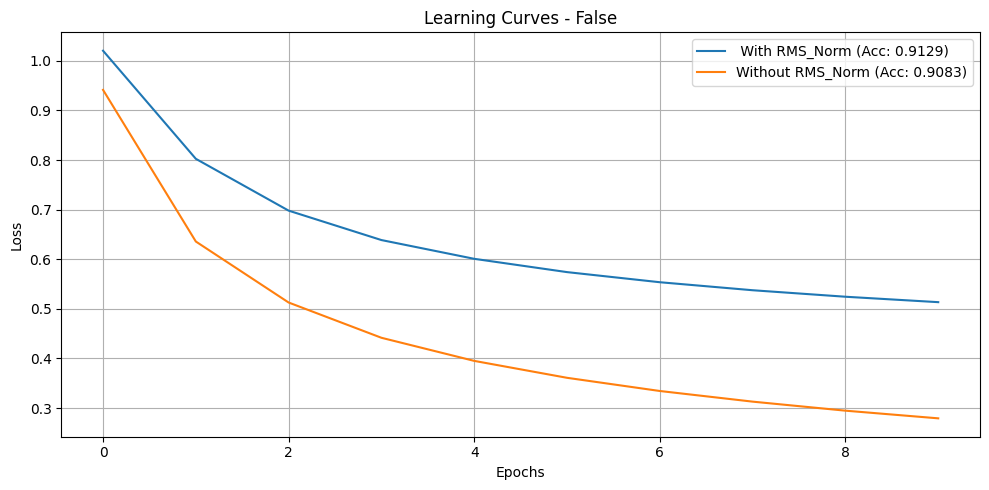

In [13]:
# =============================================================================
# 5. Pengujian Pengaruh RMS_Norm
# =============================================================================
print("\n=== 5. Pengujian Pengaruh RMS_Norm ===")

init_models = [
    {"rms_norm": True, "name": " With RMS_Norm", "gamma": 1},
    {"rms_norm": False, "name": "Without RMS_Norm", "gamma": 0},
]

init_results = []
for config in init_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=["relu", "relu", "softmax"],
        loss="categorical_cross_entropy",
        rms_norm=config["rms_norm"],
        gamma=config["gamma"]
    )
    
    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    init_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

    model.plot_gradient_distribution([0, 1, 2])
    model.plot_weight_distribution([0, 1, 2])    

plt.figure(figsize=(10, 5))
for result in init_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title(f'Learning Curves - {config["rms_norm"]}')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()